In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

Loading the dataset

In [ ]:
#finding the encoding of the dataset
with open('/content/spam.csv') as f:
  print(f,type(f))

<_io.TextIOWrapper name='/content/spam.csv' mode='r' encoding='UTF-8'> <class '_io.TextIOWrapper'>


In [ ]:
df=pd.read_csv('/content/spam.csv',encoding='ISO-8859-1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Dropping the unwanted columns

In [ ]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Renaming the column names

In [ ]:
df.rename({'v1':'message_type','v2':'message'},axis=1,inplace=True)
df

,message_type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Label encoding the target variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df.message_type=encoder.fit_transform(df.message_type)
df

,message_type,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


Checking for null and duplicate values

In [ ]:
df.isnull().sum()

message_type    0
message         0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df=df.drop_duplicates()

##Exploratory Data Analysis (EDA)

Let's do some basic EDA

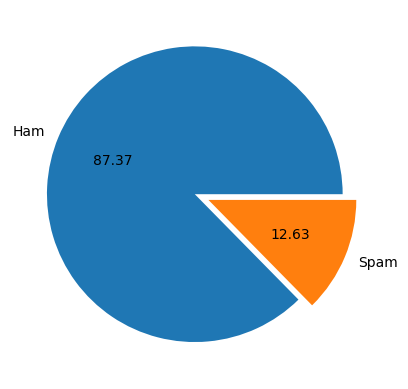

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.pie(df.message_type.value_counts(),labels=['Ham','Spam'],autopct='%0.2f',explode=(0,0.1))
plt.show()

Now, let's analyze the messages in terms of number of char, words, sentences

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['num_characters']=df['message'].apply(len)
df.head()

<ipython-input-211-e1ccf2500ea6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['message'].apply(len)


,message_type,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
from nltk.tokenize import word_tokenize
df['num_words']=df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df

<ipython-input-212-5204d4e7601e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['message'].apply(lambda x: len(nltk.word_tokenize(x)))


,message_type,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [ ]:
df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df

<ipython-input-213-76c6fe589c70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))


,message_type,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [ ]:
df[df['message_type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['message_type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


It's evident that the average length of ham messages is more than the spam messages

Let's compare the counts of no. of each parameter

<Axes: xlabel='num_characters', ylabel='Count'>

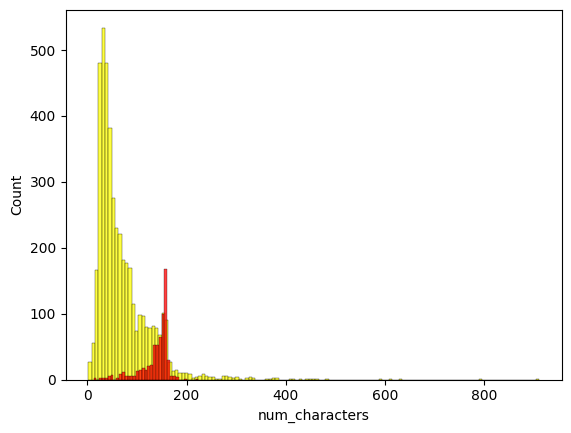

In [ ]:
sns.histplot(df[df['message_type']==0]['num_characters'],color='yellow')
sns.histplot(df[df['message_type']==1]['num_characters'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

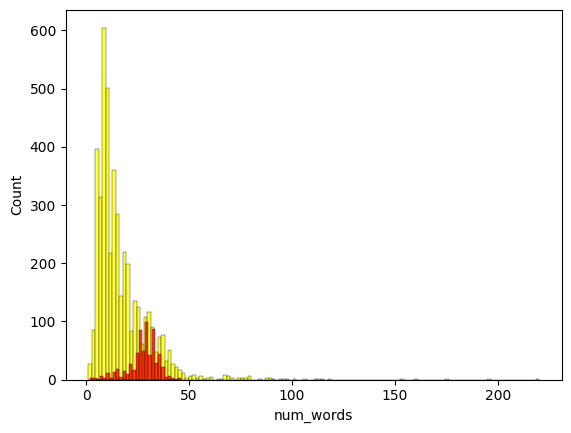

In [ ]:
sns.histplot(df[df['message_type']==0]['num_words'],color='yellow')
sns.histplot(df[df['message_type']==1]['num_words'],color='red')


<ipython-input-218-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

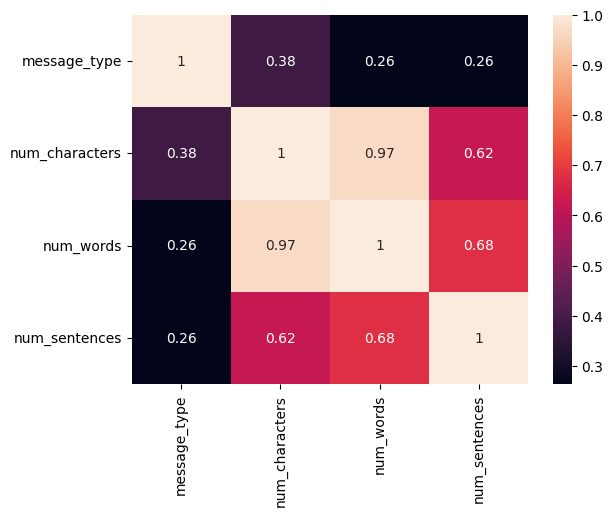

In [ ]:
sns.heatmap(df.corr(),annot=True)

From the above heatmap, it's concluded that num_characters has more colinearity with message type.

##Data Preprocessing

1. Normalization
2. Lemmatization
3. Stemming
4. Tokenization

In [ ]:
df['original_message']=df['message']
df

<ipython-input-219-dd357a2d5544>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['original_message']=df['message']


,message_type,message,num_characters,num_words,num_sentences,original_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,The guy did some bitching but I acted like i'd...


In [ ]:
# Replace addresses (hhtp, email), numbers (plain, phone), money symbols
df['message'] = df['message'].str.replace(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b',' ')
df['message'] = df['message'].str.replace(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)',' ')
df['message'] = df['message'].str.replace(r'£|\$', ' ')    
df['message'] = df['message'].str.replace(r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b',' ')    
df['message'] = df['message'].str.replace(r'\d+(\.\d+)?', ' ')

<ipython-input-220-33017aa2315d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['message'] = df['message'].str.replace(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b',' ')
<ipython-input-220-33017aa2315d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message'] = df['message'].str.replace(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b',' ')
<ipython-input-220-33017aa2315d>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['message'] = df['message'].str.replace(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)',' ')
<ipython-input-220-33017aa2315d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [ ]:
# Remove punctuation, collapse all whitespace (spaces, line breaks, tabs) into a single space & eliminate any leading/trailing whitespace.
df['message'] = df['message'].str.replace(r'[^\w\d\s]', ' ')
df['message'] = df['message'].str.replace(r'\s+', ' ')
df['message'] = df['message'].str.replace(r'^\s+|\s+?$', '')

<ipython-input-221-c24b54923565>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['message'] = df['message'].str.replace(r'[^\w\d\s]', ' ')
<ipython-input-221-c24b54923565>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message'] = df['message'].str.replace(r'[^\w\d\s]', ' ')
<ipython-input-221-c24b54923565>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['message'] = df['message'].str.replace(r'\s+', ' ')
<ipython-input-221-c24b54923565>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [ ]:
# Lowercase the entire corpus
df['message'] = df['message'].str.lower()

<ipython-input-222-874bec6a0f39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message'] = df['message'].str.lower()


In [ ]:
df

,message_type,message,num_characters,num_words,num_sentences,original_message
0,0,go until jurong point crazy available only in ...,111,24,2,"Go until jurong point, crazy.. Available only ..."
1,0,ok lar joking wif u oni,29,8,2,Ok lar... Joking wif u oni...
2,1,free entry in a wkly comp to win fa cup final ...,155,37,2,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,u dun say so early hor u c already then say,49,13,1,U dun say so early hor... U c already then say...
4,0,nah i don t think he goes to usf he lives arou...,61,15,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...,...,...,...
5567,1,this is the nd time we have tried contact u u ...,161,35,4,This is the 2nd time we have tried 2 contact u...
5568,0,will ì_ b going to esplanade fr home,37,9,1,Will Ì_ b going to esplanade fr home?
5569,0,pity was in mood for that so any other suggest...,57,15,2,"Pity, * was in mood for that. So...any other s..."
5570,0,the guy did some bitching but i acted like i d...,125,27,1,The guy did some bitching but I acted like i'd...


Removing stop words

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop_words=nltk.corpus.stopwords.words('english')
df['message']=df['message'].apply(lambda x: ' '.join(term for term in x.split() if term not in set(stop_words) ))
df

<ipython-input-225-53e7c9ee2f59>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message']=df['message'].apply(lambda x: ' '.join(term for term in x.split() if term not in set(stop_words) ))


,message_type,message,num_characters,num_words,num_sentences,original_message
0,0,go jurong point crazy available bugis n great ...,111,24,2,"Go until jurong point, crazy.. Available only ..."
1,0,ok lar joking wif u oni,29,8,2,Ok lar... Joking wif u oni...
2,1,free entry wkly comp win fa cup final tkts st ...,155,37,2,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,u dun say early hor u c already say,49,13,1,U dun say so early hor... U c already then say...
4,0,nah think goes usf lives around though,61,15,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...,...,...,...
5567,1,nd time tried contact u u å pound prize claim ...,161,35,4,This is the 2nd time we have tried 2 contact u...
5568,0,ì_ b going esplanade fr home,37,9,1,Will Ì_ b going to esplanade fr home?
5569,0,pity mood suggestions,57,15,2,"Pity, * was in mood for that. So...any other s..."
5570,0,guy bitching acted like interested buying some...,125,27,1,The guy did some bitching but I acted like i'd...


**Lemmatization**

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lemmatizer=nltk.stem.WordNetLemmatizer()
df['message']=df['message'].apply(lambda x: ' '.join(lemmatizer.lemmatize(term,pos='v') for term in x.split()))
df

<ipython-input-227-c729e2abdf7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message']=df['message'].apply(lambda x: ' '.join(lemmatizer.lemmatize(term,pos='v') for term in x.split()))


,message_type,message,num_characters,num_words,num_sentences,original_message
0,0,go jurong point crazy available bugis n great ...,111,24,2,"Go until jurong point, crazy.. Available only ..."
1,0,ok lar joke wif u oni,29,8,2,Ok lar... Joking wif u oni...
2,1,free entry wkly comp win fa cup final tkts st ...,155,37,2,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,u dun say early hor u c already say,49,13,1,U dun say so early hor... U c already then say...
4,0,nah think go usf live around though,61,15,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...,...,...,...
5567,1,nd time try contact u u å pound prize claim ea...,161,35,4,This is the 2nd time we have tried 2 contact u...
5568,0,ì_ b go esplanade fr home,37,9,1,Will Ì_ b going to esplanade fr home?
5569,0,pity mood suggestions,57,15,2,"Pity, * was in mood for that. So...any other s..."
5570,0,guy bitch act like interest buy something else...,125,27,1,The guy did some bitching but I acted like i'd...


**Stemming**

In [ ]:
porter=nltk.PorterStemmer()
df['message']=df['message'].apply(lambda x: ' '.join(porter.stem(term) for term in x.split()))
df

<ipython-input-228-23dc6abf9872>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message']=df['message'].apply(lambda x: ' '.join(porter.stem(term) for term in x.split()))


,message_type,message,num_characters,num_words,num_sentences,original_message
0,0,go jurong point crazi avail bugi n great world...,111,24,2,"Go until jurong point, crazy.. Available only ..."
1,0,ok lar joke wif u oni,29,8,2,Ok lar... Joking wif u oni...
2,1,free entri wkli comp win fa cup final tkt st m...,155,37,2,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,u dun say earli hor u c alreadi say,49,13,1,U dun say so early hor... U c already then say...
4,0,nah think go usf live around though,61,15,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...,...,...,...
5567,1,nd time tri contact u u å pound prize claim ea...,161,35,4,This is the 2nd time we have tried 2 contact u...
5568,0,ì_ b go esplanad fr home,37,9,1,Will Ì_ b going to esplanade fr home?
5569,0,piti mood suggest,57,15,2,"Pity, * was in mood for that. So...any other s..."
5570,0,guy bitch act like interest buy someth els nex...,125,27,1,The guy did some bitching but I acted like i'd...


**Tokenization**

In [ ]:
#df['message'] = df['message'].apply(lambda sms: nltk.word_tokenize(sms))
df

,message_type,message,num_characters,num_words,num_sentences,original_message
0,0,go jurong point crazi avail bugi n great world...,111,24,2,"Go until jurong point, crazy.. Available only ..."
1,0,ok lar joke wif u oni,29,8,2,Ok lar... Joking wif u oni...
2,1,free entri wkli comp win fa cup final tkt st m...,155,37,2,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,u dun say earli hor u c alreadi say,49,13,1,U dun say so early hor... U c already then say...
4,0,nah think go usf live around though,61,15,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...,...,...,...
5567,1,nd time tri contact u u å pound prize claim ea...,161,35,4,This is the 2nd time we have tried 2 contact u...
5568,0,ì_ b go esplanad fr home,37,9,1,Will Ì_ b going to esplanade fr home?
5569,0,piti mood suggest,57,15,2,"Pity, * was in mood for that. So...any other s..."
5570,0,guy bitch act like interest buy someth els nex...,125,27,1,The guy did some bitching but I acted like i'd...


**Word Cloud**

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

For spam

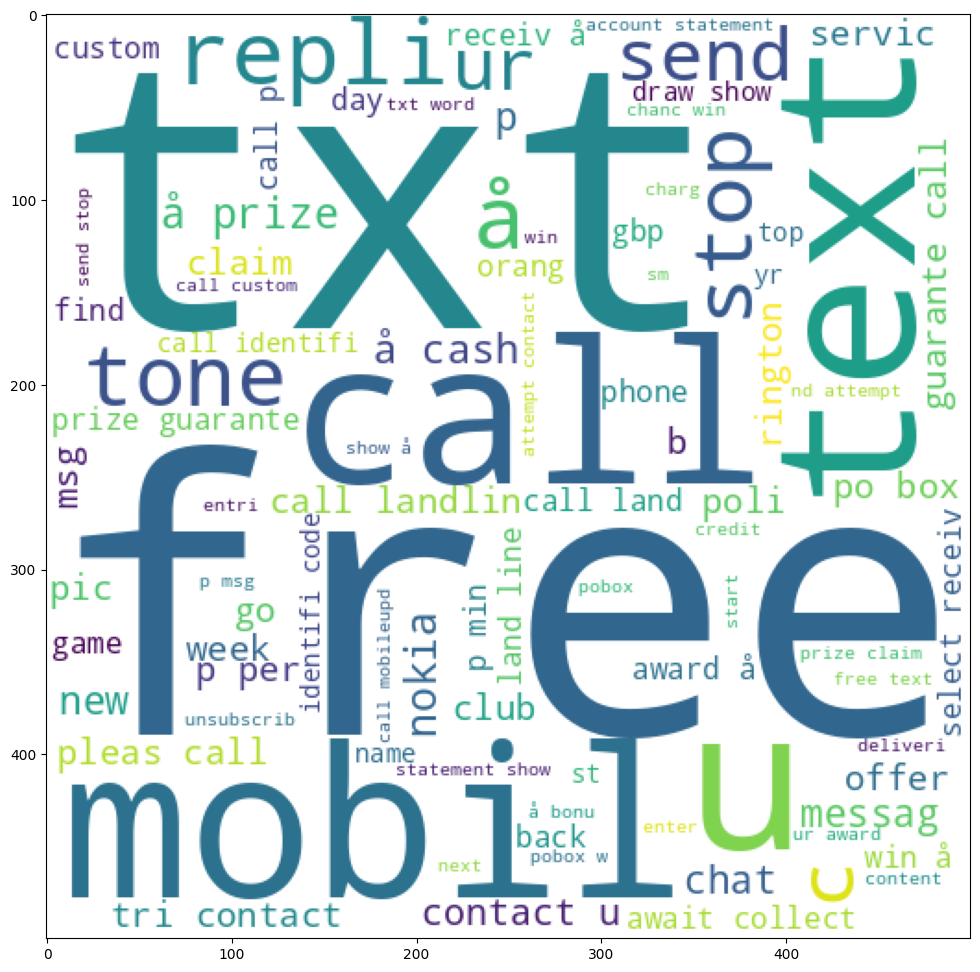

In [ ]:
spam_wc=wc.generate(df[df['message_type']==1]['message'].str.cat(sep=''))
plt.figure(figsize=(18,12))
plt.imshow(spam_wc)

For ham

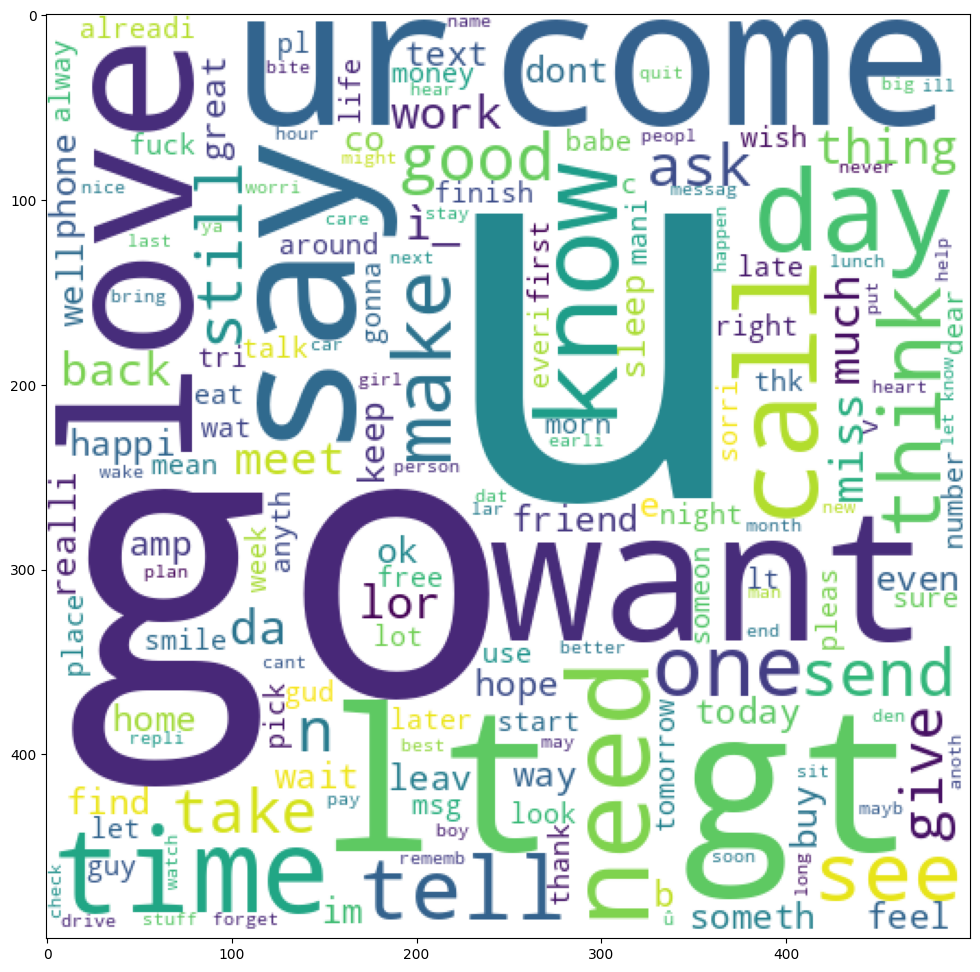

In [ ]:
ham_wc=wc.generate(df[df['message_type']==0]['message'].str.cat(sep=''))
plt.figure(figsize=(18,12))
plt.imshow(ham_wc)

##Model Building

Using Multinomial Naive Bayes Classification

To vectorize the text, there are two common approaches:
1. Bag of words (Using CountVectorizer)
2. Term Frequency, Inverse Domain Frequency(TFIDF)

Let's use the TFIDF vectorizer...

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf=TfidfVectorizer(max_features=3000)
# X=tfidf.fit_transform(df['message']).toarray()
# y=df['message_type'].values

CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
X=v.fit_transform(df['message']).toarray()[:]
y=df['message_type'].values


Splitting train and test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [ ]:
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred))


Accuracy score of Multinomial NB is:  0.9622823984526112
Confusion Matrix of Multinomial NB is:  [[868  28]
 [ 11 127]]
Precision score of the Multinomial NB is 0.8193548387096774


In [ ]:
nb.score(X_test,y_test)

0.9622823984526112

Our model is ready!

Testing our model:

In [244]:
sms=[
    'Hii there. This is Dhanush',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
    ]



sms_count=v.transform(sms)
nb.predict(sms_count)

array([0, 1])